### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Data importing

In [2]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Some Brief About the data

#### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Handeling Missing Values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

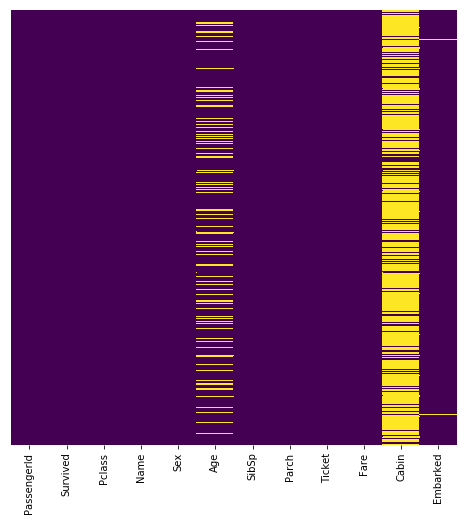

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.drop('Cabin',axis=1,inplace=True)

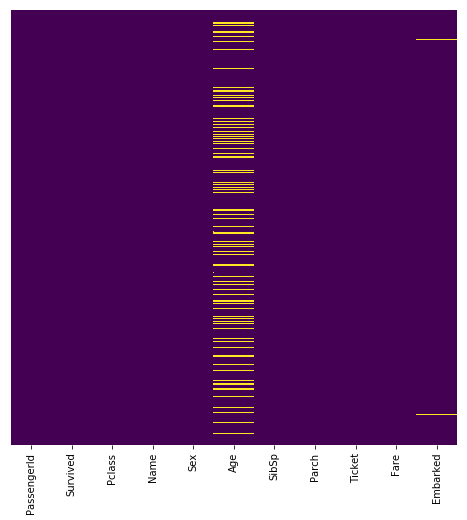

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [9]:
def agefilling(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 27
        else:
            return 25
    else:
        return age

In [10]:
df["Age"]=df[["Age","Pclass"]].apply(agefilling,axis=1)

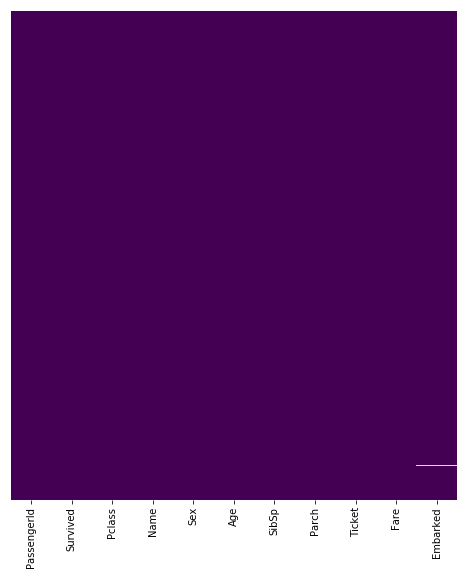

In [11]:
plt.figure(figsize=(8,9))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [17]:
df["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64


from this we can now know there were 342 people who have survived and 549 were died in titanic

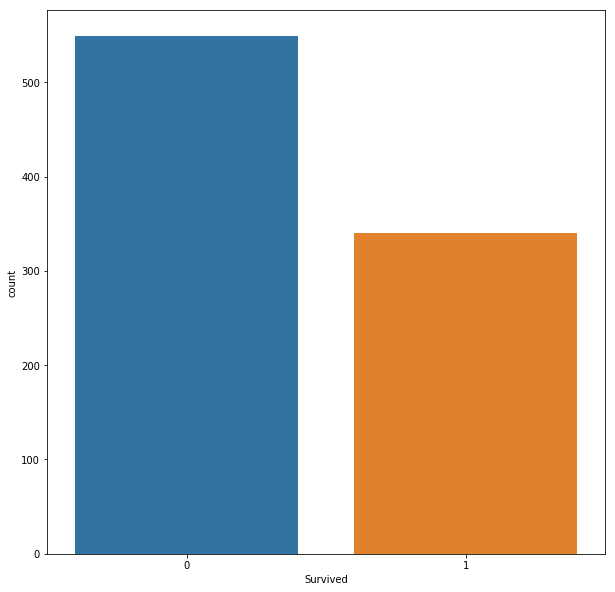

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x="Survived",data=df)
plt.show()

## visualization of survived with respcet to gender

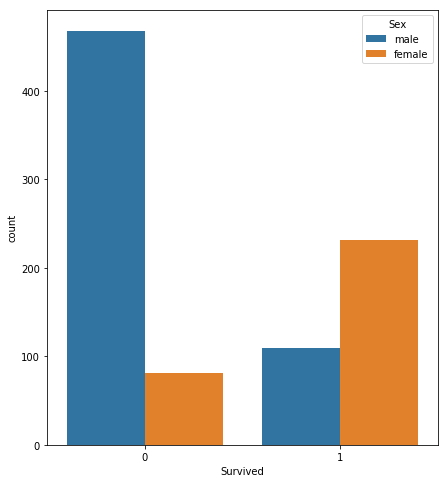

In [19]:
plt.figure(figsize=(7,8))
sns.countplot(data=df,x="Survived",hue="Sex")
plt.show()

In [20]:
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

#### analysis on the basis of passenger Class 

In [21]:
df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

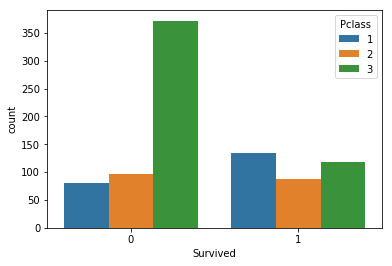

In [22]:
sns.countplot(data=df,x="Survived", hue ="Pclass")
plt.show()

#### Above data  shows that  males from 3rd class are mostly not survived

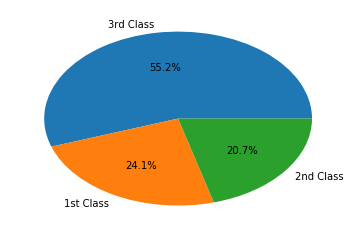

In [23]:
plt.pie(df["Pclass"].value_counts(), labels=["3rd Class","1st Class","2nd Class"],autopct="%1.1f%%")
plt.show()

In [24]:
df["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
df["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

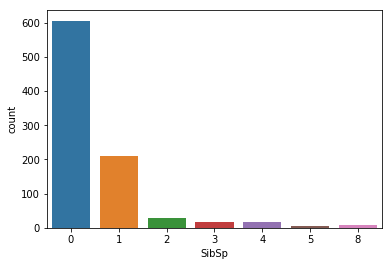

In [26]:
sns.countplot(data=df, x="SibSp")
plt.show()

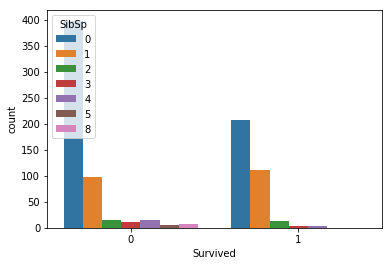

In [27]:
#visualization of Sibling-spouse with respect to survived column.
sns.countplot(data=df, x="Survived", hue ="SibSp")
plt.show()

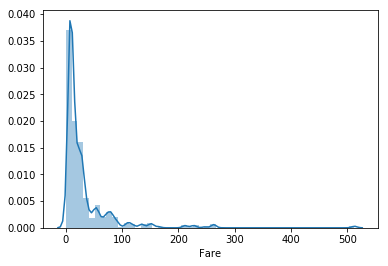

In [28]:
sns.distplot(df["Fare"])
plt.show()

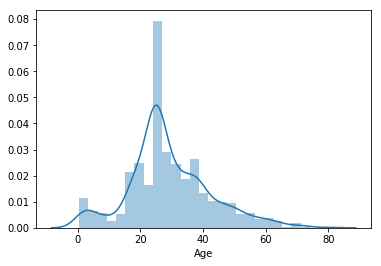

In [29]:
sns.distplot(df["Age"])
plt.show()

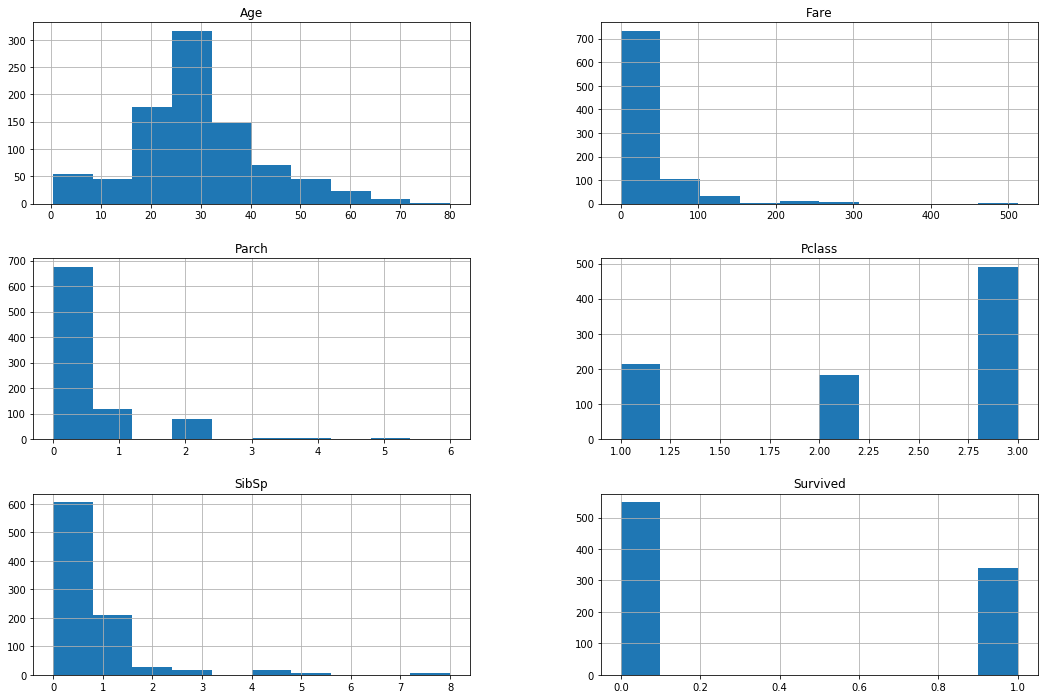

In [30]:
df.hist(figsize=(18,12))
plt.show()

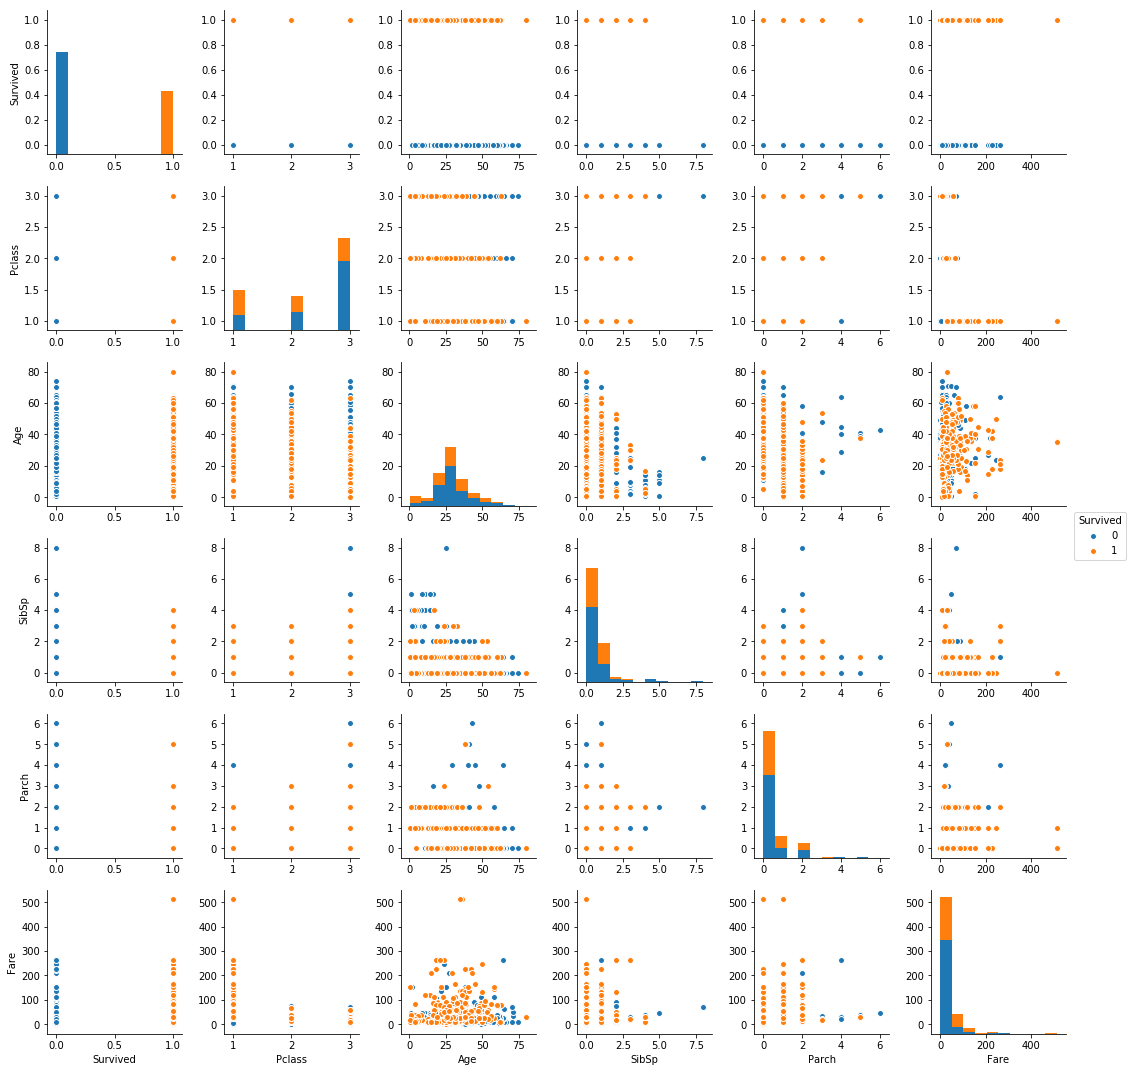

In [31]:
sns.pairplot(df, hue="Survived")
plt.show()

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.090748
2    29.705598
3    25.101670
Name: Age, dtype: float64

In [34]:
df.groupby(["Embarked","Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [35]:
df.groupby(["Embarked","Survived","Sex"]).size()

Embarked  Survived  Sex   
C         0         female      9
                    male       66
          1         female     64
                    male       29
Q         0         female      9
                    male       38
          1         female     27
                    male        3
S         0         female     63
                    male      364
          1         female    140
                    male       77
dtype: int64

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
#it is very important to encode all object into binary numbers because no algorithem works on object data type
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[["Sex","Embarked"]]=oe.fit_transform(df[["Sex","Embarked"]])

In [38]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


#### as you can see in above data there is no objective data type remain now move to the splitting the target feature and indipendent variable feature.

In [39]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [40]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
5,3,1.0,25.0,0,0,8.4583,1.0
6,1,1.0,54.0,0,0,51.8625,2.0
7,3,1.0,2.0,3,1,21.0750,2.0
8,3,0.0,27.0,0,2,11.1333,2.0
9,2,0.0,14.0,1,0,30.0708,0.0


In [41]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


## Train Test split

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(xtrain,ytrain)

ypred = logreg.predict(xtest)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accyracy :- {ac}\n {cm}\n {cr}")

Accyracy :- 0.8052434456928839
 [[141  24]
 [ 28  74]]
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [45]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Acccuracy:- {train}\n Testing Accuacy:- {test}")

Training Acccuracy:- 0.8038585209003215
 Testing Accuacy:- 0.8052434456928839


In [46]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    train_Score=model.score(xtrain,ytrain)
    test_Score=model.score(xtest,ytest)
    ra = roc_auc_score(ytest,ypred)
    
    print(f"train:-{train_Score}\ntest:- {test_Score}")
    print()
    print(f"Accuracy_Score:-{accuracy_score(ypred,ytest)}")
    
    print(f"AUC:-{ra}")
    
    
    print("CLASSIFICATION_REPORT\n",classification_report(ypred,ytest))
    
    print()
    return model

In [47]:
#logistic Regresssion
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
logreg=LogisticRegression()
logregCV=LogisticRegressionCV(cv=10)

#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()

#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
bnb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()



In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import roc_curve,precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import accuracy_score, make_scorer


# Logistic Regression

In [49]:
mymodel(logreg)

train:-0.8038585209003215
test:- 0.8052434456928839

Accuracy_Score:-0.8052434456928839
AUC:-0.790017825311943
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       169
           1       0.73      0.76      0.74        98

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267




LogisticRegression()

# KNN 

In [50]:
mymodel(knn)

train:-0.7813504823151125
test:- 0.7191011235955056

Accuracy_Score:-0.7191011235955056
AUC:-0.6903743315508021
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       178
           1       0.57      0.65      0.61        89

    accuracy                           0.72       267
   macro avg       0.69      0.70      0.69       267
weighted avg       0.73      0.72      0.72       267




KNeighborsClassifier()

# Support Vector Machine

In [51]:
mymodel(svc)

train:-0.6768488745980707
test:- 0.6928838951310862

Accuracy_Score:-0.6928838951310862
AUC:-0.6223707664884135
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       221
           1       0.32      0.72      0.45        46

    accuracy                           0.69       267
   macro avg       0.62      0.70      0.62       267
weighted avg       0.82      0.69      0.73       267




SVC()

# Decision Tree

In [52]:
mymodel(dtc)

train:-0.9823151125401929
test:- 0.7940074906367042

Accuracy_Score:-0.7940074906367042
AUC:-0.7753119429590017
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       172
           1       0.70      0.75      0.72        95

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.79      0.80       267




DecisionTreeClassifier()

# Random Forest

In [53]:
mymodel(rfc)

train:-0.9823151125401929
test:- 0.8202247191011236

Accuracy_Score:-0.8202247191011236
AUC:-0.8040106951871658
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       171
           1       0.74      0.78      0.76        96

    accuracy                           0.82       267
   macro avg       0.80      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267




RandomForestClassifier()

# Naive Bayes Algorithm

#### Bernauli Naive Bayes

In [54]:
mymodel(bnb)

train:-0.7813504823151125
test:- 0.7940074906367042

Accuracy_Score:-0.7940074906367042
AUC:-0.7734402852049911
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       174
           1       0.69      0.75      0.72        93

    accuracy                           0.79       267
   macro avg       0.77      0.78      0.78       267
weighted avg       0.80      0.79      0.80       267




BernoulliNB()

#### gausian naive bayes

In [55]:
mymodel(gnb)

train:-0.7813504823151125
test:- 0.8127340823970037

Accuracy_Score:-0.8127340823970037
AUC:-0.8035650623885917
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       163
           1       0.76      0.75      0.76       104

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267




GaussianNB()

In [56]:
mymodel(logreg)

train:-0.8038585209003215
test:- 0.8052434456928839

Accuracy_Score:-0.8052434456928839
AUC:-0.790017825311943
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       169
           1       0.73      0.76      0.74        98

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267




LogisticRegression()

# Forecast Newobservation

In [57]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0


In [58]:
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [59]:
def predictsurvived():
    pclass = int(input("Enter Passenger Class in 1,2,3:- "))
    sex = input("Enter Gender Of The Passeneger,male/female:- ")
    age = int(input("Enter The Age Of an Passeneger:- "))
    sibsp = int(input("Enter the No of SibSp  :- "))
    parch = int(input("Enter The No of Parch :- "))
    fare = float(input("Enter Ticket Price:- "))
    embarked = input("Enter Port Of Embarkation,in C,Q,S :- ")
    
    newob = [pclass,sex,age,sibsp,parch,fare,embarked]
    newob[1],newob[-1]=oe.transform([[newob[1],newob[-1]]])[0]
    v = logreg.predict([newob])[0]
    
    if v==1:
        print("YES, The Passeneger Has Survived...!!!")
    else:
        print("NO, The Passenger Died...!!SORRY FOR YOUR LOSS")
    return v

In [60]:
predictsurvived()

Enter Passenger Class in 1,2,3:- 3
Enter Gender Of The Passeneger,male/female:- female
Enter The Age Of an Passeneger:- 54
Enter the No of SibSp  :- 0
Enter The No of Parch :- 0
Enter Ticket Price:- 87
Enter Port Of Embarkation,in C,Q,S :- Q
NO, The Passenger Died...!!SORRY FOR YOUR LOSS


0